In [1]:
# This is Lecture06 - Demo
# of the "Data Science" class at Technische Hochschule Rosenheim

In [2]:
# this notebook is inspired by / some code taken from
# https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57

# Visualizations

Dataset: The <a href="https://archive.ics.uci.edu/ml/datasets/wine+quality">Wine Quality Data Set</a> from the UCI Machine Learning Repository. 

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.

We will be using seaborn for most plots

In [3]:
%matplotlib inline
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing

In [4]:
red_wine = pd.read_csv('data/winequality-red.csv', sep=';')
white_wine = pd.read_csv('data/winequality-white.csv', sep=';')

# store wine type as an attribute
red_wine['wine_type'] = 'red'   
white_wine['wine_type'] = 'white'

# bucket wine quality scores into qualitative quality labels
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low' 
                                                          if value <= 5 else 'medium' 
                                                              if value <= 7 else 'high')
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], 
                                           categories=['low', 'medium', 'high'])
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low' 
                                                              if value <= 5 else 'medium' 
                                                                  if value <= 7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], 
                                             categories=['low', 'medium', 'high'])

# merge red and white wine datasets
wines = pd.concat([red_wine, white_wine])

# re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

In [5]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


We have several numeric and categorical attributes for wine samples. Each observation belongs to a red or white wine sample and the attributes are specific attributes or properties measured and obtained from physicochemical tests.

In [6]:
subset_attributes = ['residual sugar', 'total sulfur dioxide', 'sulphates', 
                     'alcohol', 'volatile acidity', 'quality']
rs = round(red_wine[subset_attributes].describe(),2)
ws = round(white_wine[subset_attributes].describe(),2)

pd.concat([rs, ws], axis=1, keys=['Red Wine Statistics', 'White Wine Statistics'])

Red Wine Statistics                                          \
           residual sugar total sulfur dioxide sulphates  alcohol   
count             1599.00              1599.00   1599.00  1599.00   
mean                 2.54                46.47      0.66    10.42   
std                  1.41                32.90      0.17     1.07   
min                  0.90                 6.00      0.33     8.40   
25%                  1.90                22.00      0.55     9.50   
50%                  2.20                38.00      0.62    10.20   
75%                  2.60                62.00      0.73    11.10   
max                 15.50               289.00      2.00    14.90   

                                White Wine Statistics                       \
      volatile acidity  quality        residual sugar total sulfur dioxide   
count          1599.00  1599.00               4898.00              4898.00   
mean              0.53     5.64                  6.39               138.36   
std               0.18     0.81                  5.07                42.50   
min               0.12     3.00                  0.60                 9.00   
25%               0.39     5.00                  1.70               108.00   
50%               0.52     6.00                  5.20               134.00   
75%               0.64     6.00                  9.90               167.00   
max               1.58     8.00                 65.80               440.00   

                                                    
      sulphates  alcohol volatile acidity  quality  
count   4898.00  4898.00          4898.00  4898.00  
mean       0.49    10.51             0.28     5.88  
std        0.11     1.23             0.10     0.89  
min        0.22     8.00             0.08     3.00  
25%        0.41     9.50             0.21     5.00  
50%        0.47    10.40             0.26     6.00  
75%        0.55    11.40             0.32     6.00  
max        1.08    14.20             1.10     9.00

## Univariate

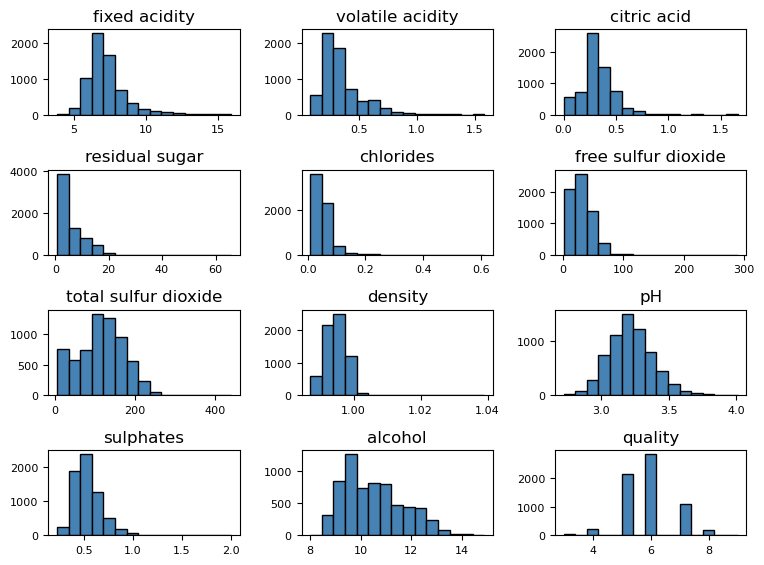

In [7]:
# histograms using pandas

wines.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 

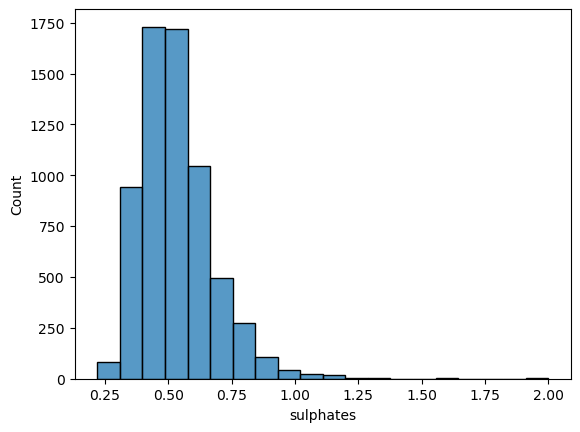

In [8]:
# histogram
_=sns.histplot(data=wines.sulphates, bins=20)

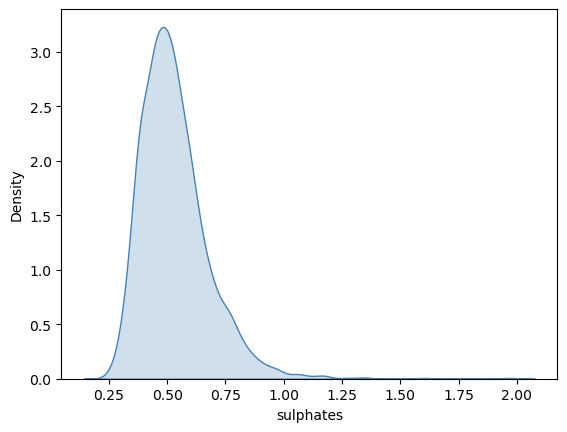

In [9]:
# density plot
_=sns.kdeplot(data=wines.sulphates, fill=True, color='steelblue')

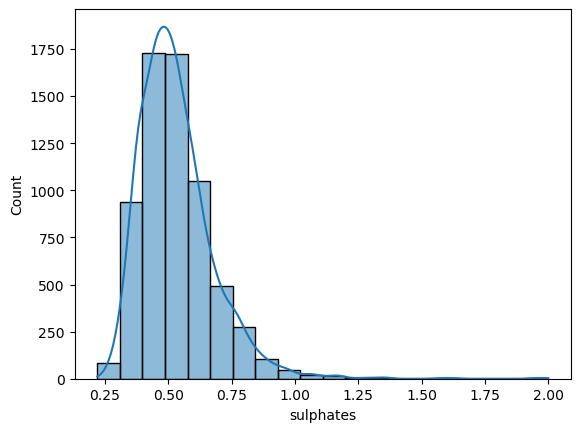

In [10]:
# histogram incl density plot
_=sns.histplot(data=wines.sulphates, bins=20, kde=True)

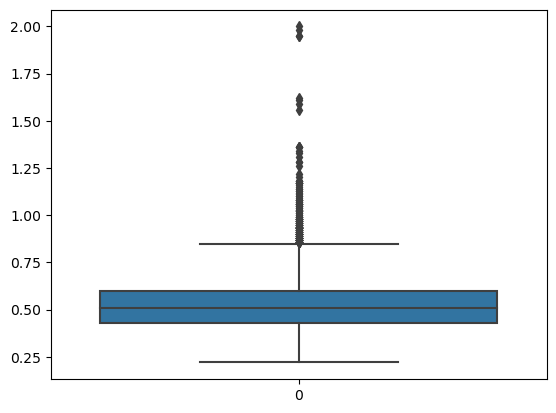

In [11]:
# boxplot
_=sns.boxplot(data = wines.sulphates)

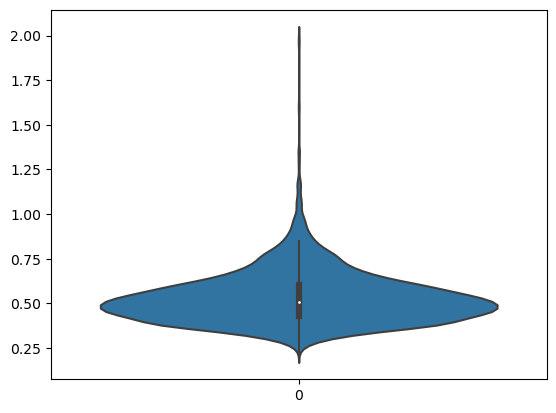

In [12]:
# violin plot
_=sns.violinplot(data=wines.sulphates)

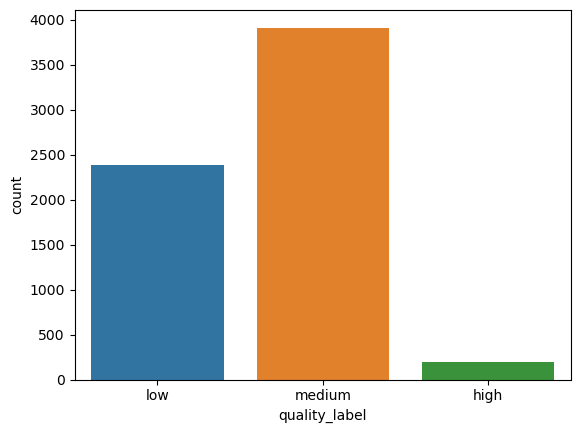

In [13]:
# frequency plot 
_=sns.countplot(data=wines, x="quality_label")

## Bivariate

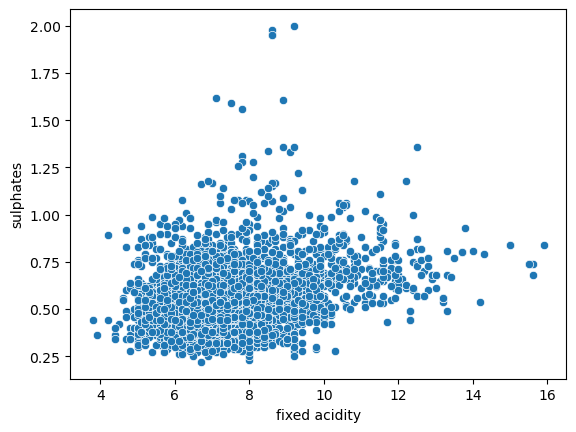

In [14]:
# Scatter plot
_=sns.scatterplot(data=wines, x="fixed acidity", y="sulphates")

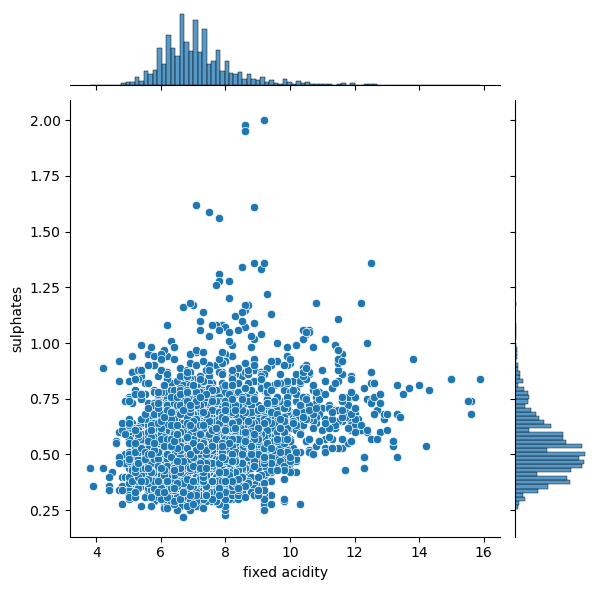

In [15]:
# Joint plot
_=sns.jointplot(data=wines, x="fixed acidity", y="sulphates")

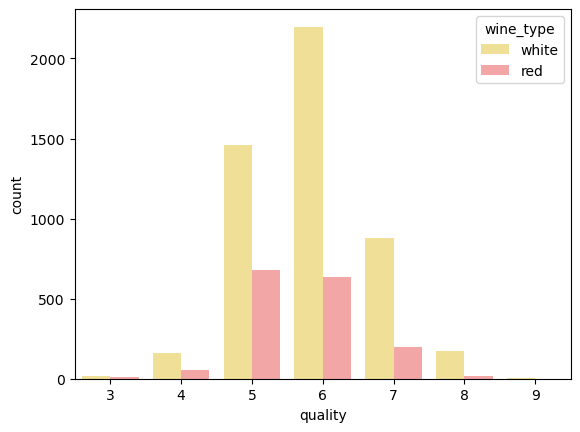

In [16]:
# multi-bar plot
cp = sns.countplot(x="quality", hue="wine_type", data=wines, 
                   palette={"red": "#FF9999", "white": "#FFE888"})

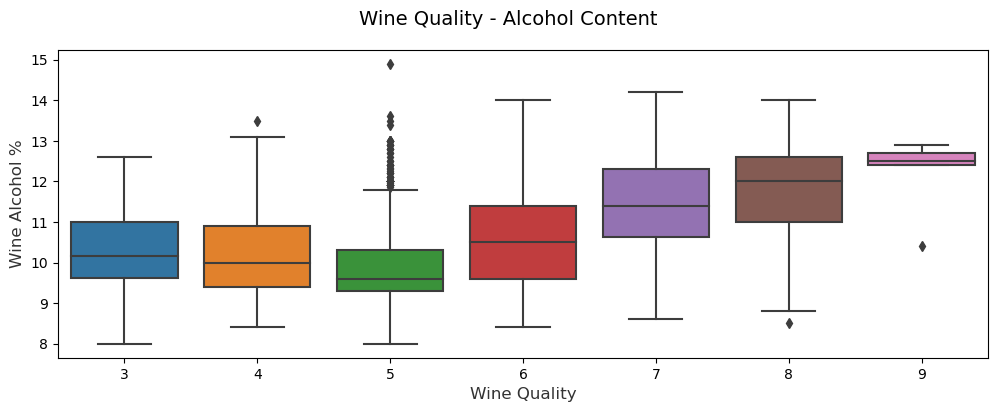

In [17]:
# Multi Box Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Wine Quality - Alcohol Content', fontsize=14)

sns.boxplot(x="quality", y="alcohol", data=wines,  ax=ax)
ax.set_xlabel("Wine Quality",size = 12,alpha=0.8)
_=ax.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

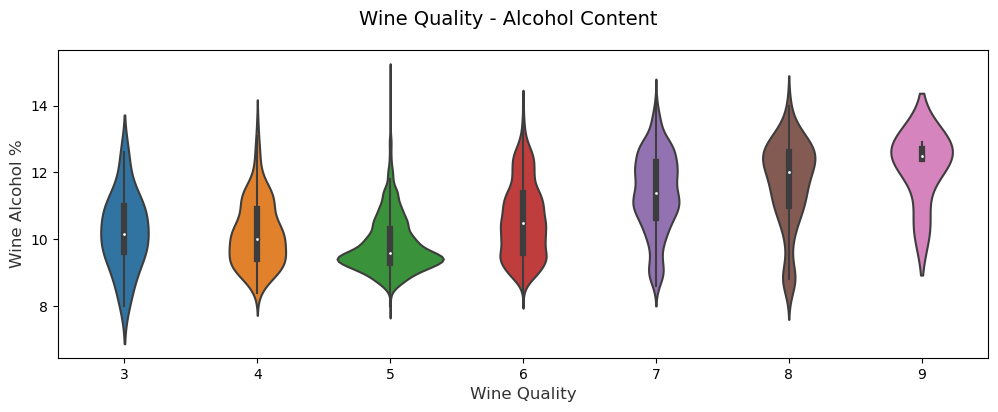

In [18]:
# Multi Violin Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Wine Quality - Alcohol Content', fontsize=14)

sns.violinplot(x="quality", y="alcohol", data=wines,  ax=ax)
ax.set_xlabel("Wine Quality",size = 12,alpha=0.8)
_=ax.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

## Bivariate for multiple attributes

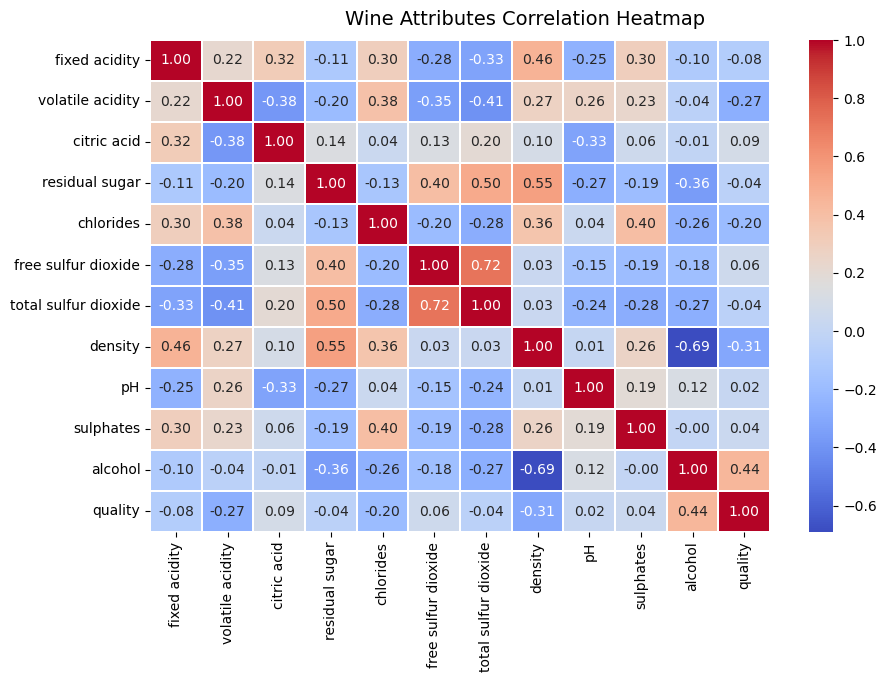

In [19]:
# Pair-wise Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = wines.corr(numeric_only=True)
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

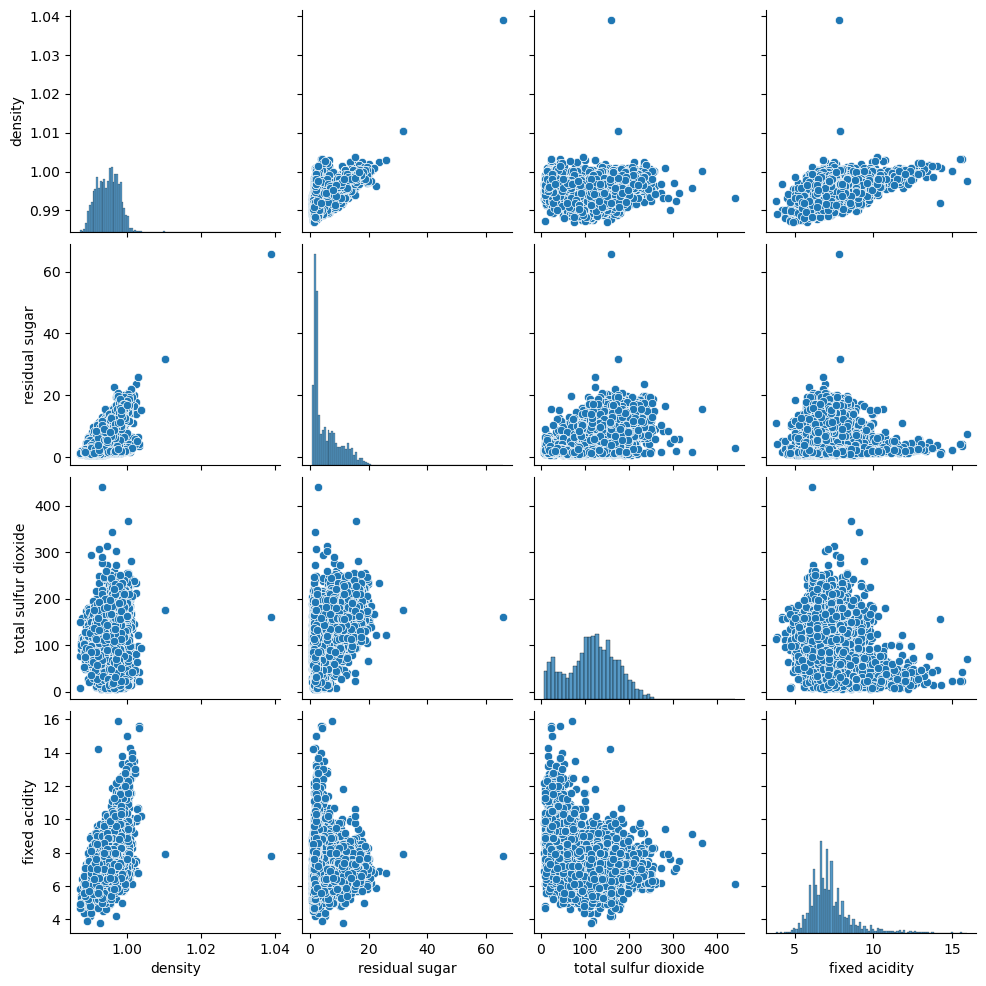

In [20]:
# Pair-wise Scatter Plots
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']
_=sns.pairplot(wines[cols])

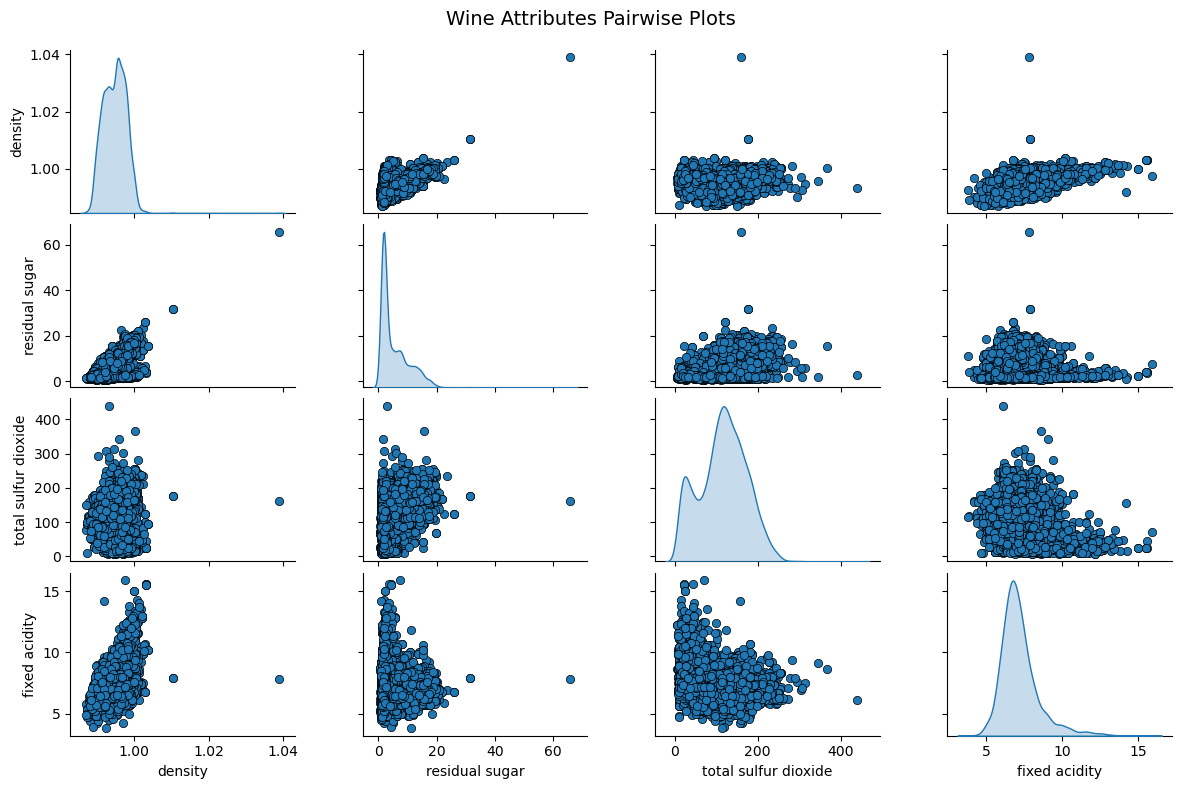

In [21]:
# Pair-wise Scatter Plots - a little nicer
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']
pp = sns.pairplot(wines[cols], height=2, aspect=1.5, # set height of each facet to 2 inches and width to 2*1.5 inches
                  plot_kws=dict(edgecolor="black", linewidth=0.5), # change edges of points to thin black
                  diag_kind="kde", diag_kws=dict(fill=True)) # set diagonal to density charts, kws=keyword arguments

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3) # increase top space and white spaces between the plots
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14) # add title to figure

## Multivariate

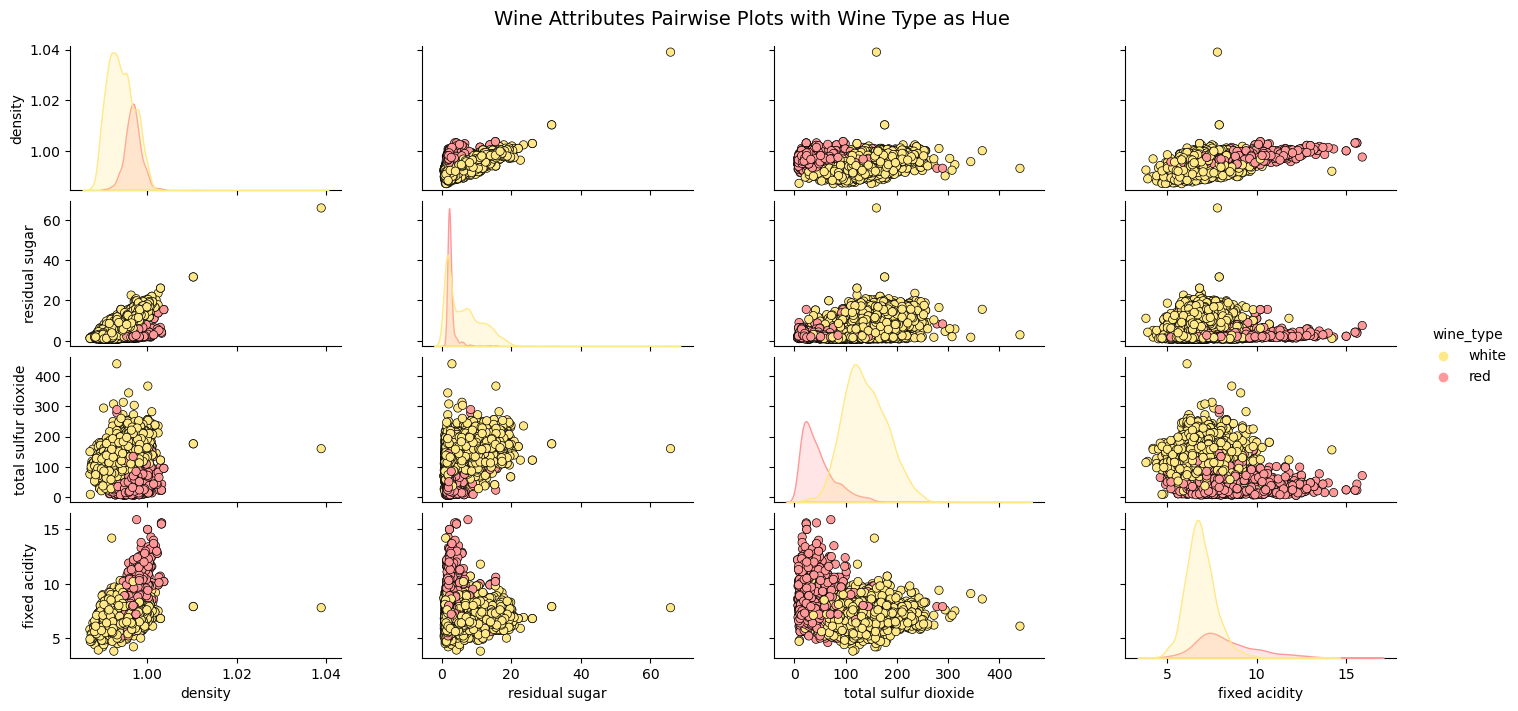

In [22]:
# Scatter Plot with Hue 
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity', 'wine_type']
pp = sns.pairplot(wines[cols], hue='wine_type', height=1.8, aspect=2, 
                  palette={"red": "#FF9999", "white": "#FFE888"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots with Wine Type as Hue', fontsize=14)

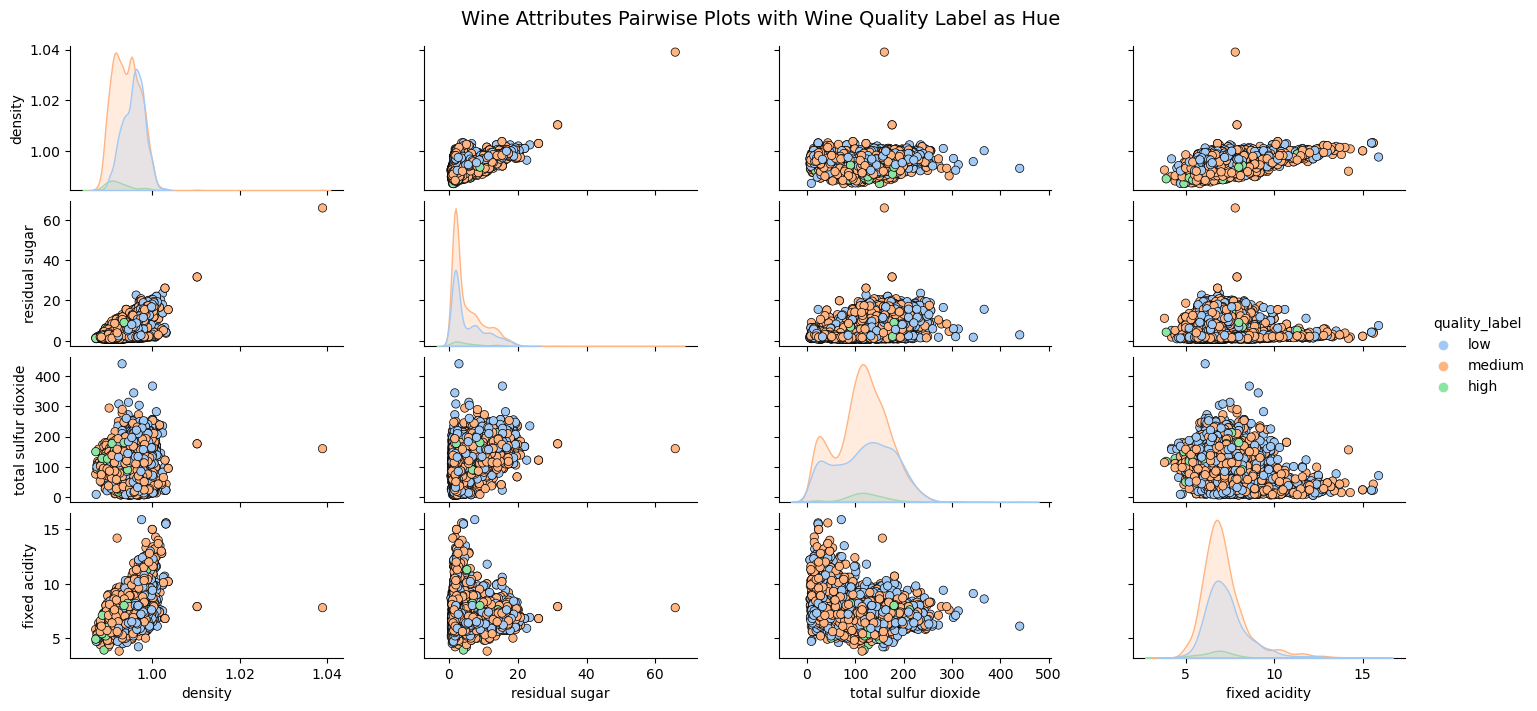

In [23]:
# Scatter Plot with Color
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity', 'quality_label']
pp = sns.pairplot(wines[cols], hue='quality_label', height=1.8, aspect=2, 
                  #palette={"low": "#FF3333", "medium": "#33FF33", "high": "#3333FF"}, # either a dictionary
                  palette = sns.color_palette("pastel")[:3], # or a predefined palette
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots with Wine Quality Label as Hue', fontsize=14)

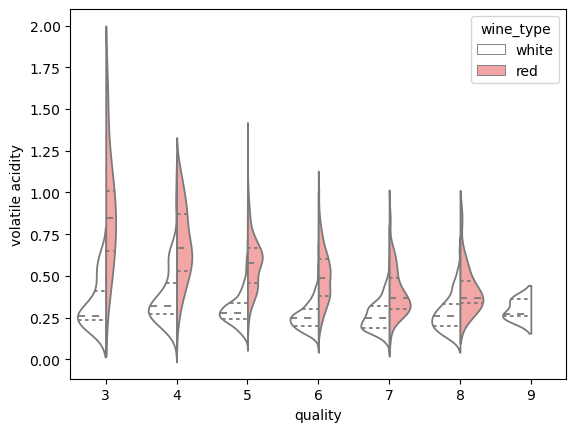

In [24]:
# multi violin plot with wine type as hue
_=sns.violinplot(x="quality", y="volatile acidity", hue="wine_type", 
               data=wines, split=True, inner="quart", linewidth=1.3,
               palette={"red": "#FF9999", "white": "white"})


------